In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-and-cats-cnn/labels_test.csv
/kaggle/input/dog-and-cats-cnn/input_test.csv
/kaggle/input/dog-and-cats-cnn/input.csv
/kaggle/input/dog-and-cats-cnn/labels.csv


In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [6]:
#Load Dataset 
X_train = np.loadtxt('/kaggle/input/dog-and-cats-cnn/input.csv',delimiter=',')
Y_train = np.loadtxt('/kaggle/input/dog-and-cats-cnn/labels.csv',delimiter=',')

X_test = np.loadtxt('/kaggle/input/dog-and-cats-cnn/input_test.csv',delimiter=',')
Y_test = np.loadtxt('/kaggle/input/dog-and-cats-cnn/labels_test.csv',delimiter=',')

In [7]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

#we need to rescale the values between 0 to 1, so we divide it by 255

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print("Shape of x_train: ",X_train.shape)
print("shape of y_train: ",Y_train.shape)
print("shape of x_test: ",X_test.shape)
print("shape of y_test: ",Y_test.shape)


Shape of x_train:  (2000, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of x_test:  (400, 100, 100, 3)
shape of y_test:  (400, 1)


In [9]:
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

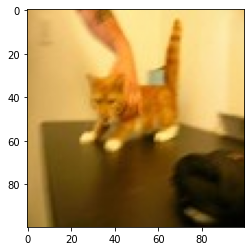

In [10]:
plt.imshow(X_train[1000])

In [11]:
#Model 
model = Sequential([
    
    Conv2D( 32 , (3,3) , activation = 'relu' , input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

# we need Conv2D because it is a 2-D image we are dealing with  
# inside Conv2D we have four arguments 
# first is the  number of filters, we have chosen 32 filters
# second is the shape of the filter, we are using 3x3 filter
# third we are giving the input shape of the picture present in the dataset, in here we have RGB image with 64x64 resolution and 3 for RGB
# mentioning the activation function we'll use, in here we are using relu

    Conv2D(32 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),

#adding another convolutional layer

    Flatten(),
    
    Dense(64, activation = 'relu'),
# we hav emany layers available after flattening and these nodes shall serve as inputs to the fully connceted layers
# this layer is present between the input layer and the output layer, we can refer it to the hidden layer 
# 'units' is the number of nodes that should be present in this hidden layer 
    
    Dense(1, activation = 'sigmoid')

# this is the output layer and contain only one node, as it is binary classification 

])

2023-01-05 17:22:36.217399: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
#compilation includes loss calculation , back-propogation as well as many hyper-parameters

In [14]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 5s 146ms/step - loss: 0.4062 - accuracy: 0.8185
Epoch 2/10
32/32 [==============================] - 5s 147ms/step - loss: 0.3308 - accuracy: 0.8655
Epoch 3/10
32/32 [==============================] - 5s 149ms/step - loss: 0.2564 - accuracy: 0.8995
Epoch 4/10
32/32 [==============================] - 5s 145ms/step - loss: 0.2073 - accuracy: 0.9215
Epoch 5/10
32/32 [==============================] - 5s 146ms/step - loss: 0.1324 - accuracy: 0.9590
Epoch 6/10
32/32 [==============================] - 5s 171ms/step - loss: 0.1003 - accuracy: 0.9680
Epoch 7/10
32/32 [==============================] - 5s 149ms/step - loss: 0.0744 - accuracy: 0.9805
Epoch 8/10
32/32 [==============================] - 5s 147ms/step - loss: 0.0591 - accuracy: 0.9835
Epoch 9/10
32/32 [==============================] - 5s 146ms/step - loss: 0.0364 - accuracy: 0.9935
Epoch 10/10
32/32 [==============================] - 5s 147ms/step - loss: 0.0246 - accuracy: 0.9955

In [15]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.4825 - accuracy: 0.6850


[1.4824780225753784, 0.6850000023841858]

In [17]:
import random

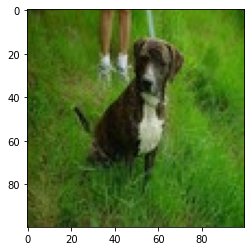

[[0.00011081]]


In [29]:
#making individual prediction
idx = random.randint(0,len(Y_test))
plt.imshow(X_test[idx, :])
plt.show()

Y_pred = model.predict(X_test[idx, :].reshape(1,100,100,3))
print(Y_pred)
